# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
!pip install -U matplotlib==2.2.2

    100% |████████████████████████████████| 12.6MB 55kB/s  eta 0:00:01
    100% |████████████████████████████████| 12.2MB 56kB/s  eta 0:00:01
Requirement already up-to-date: six>=1.10 in /opt/conda/lib/python3.6/site-packages (from matplotlib==2.2.2)
Requirement already up-to-date: cycler>=0.10 in /opt/conda/lib/python3.6/site-packages/cycler-0.10.0-py3.6.egg (from matplotlib==2.2.2)
    100% |████████████████████████████████| 952kB 713kB/s eta 0:00:01
Requirement already up-to-date: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /opt/conda/lib/python3.6/site-packages (from matplotlib==2.2.2)
    100% |████████████████████████████████| 215kB 3.1MB/s eta 0:00:01
    100% |████████████████████████████████| 512kB 1.4MB/s eta 0:00:01
    100% |████████████████████████████████| 573kB 1.2MB/s eta 0:00:01
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: setuptools 38.4.0
    Uninstalling setuptoo

In [2]:
data_dir = '/data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
# Note: because of a version problem with matplot lib, the following line of code doesn't work in this workspace.
# pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

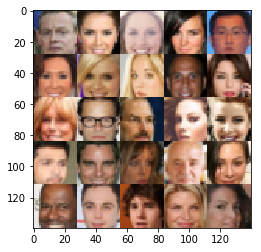

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_dim = (image_width, image_height, image_channels)
    input_real = tf.placeholder(tf.float32, shape=(None, *real_dim), name='input_real')
    input_z = tf.placeholder(tf.float32, shape=(None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :param alpha: Float, greater than 0.0, negative slope coefficient for leaky relu
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        # input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        x1 = tf.maximum(alpha * x1, x1)
        # size 14x14x64
        
        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        # size 7x7x128
        
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        # size 4x4x256
        
        # flatten
        flatten = tf.reshape(x3, (-1, 4*4*256))
        logits = tf.layers.dense(flatten, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :param alpha: Float, greater than 0.0, negative slope coefficient for leaky relu
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        x1 = tf.layers.dense(z, 7*7*256)
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # size 6x6x128
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # size 14x14x64
        
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides=2, padding='same')
        # size 28x28x3
        
        out = tf.tanh(logits)

        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :param alpha: Float, greater than 0.0, negative slope coefficient for leaky relu
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real))
    )
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake))
    )
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake))
    )
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1)
        d_train_opt = d_train_opt.minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1)
        g_train_opt = g_train_opt.minimize(g_loss, var_list=g_vars)
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    losses = []
    steps = 0
    print_every = 10
    show_every = 100
    
    image_width = data_shape[1]
    image_height = data_shape[2]
    image_channels = 1 if data_image_mode == 'L' else 3
    
    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
        
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                # normalize input image
                batch_images = batch_images * 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % show_every == 0:
                    show_generator_output(sess, n_images=16, input_z=input_z, out_channel_dim=image_channels, image_mode=data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.5019... Generator Loss: 2.0904
Epoch 1/2... Discriminator Loss: 1.1154... Generator Loss: 4.4404
Epoch 1/2... Discriminator Loss: 2.0671... Generator Loss: 5.1547
Epoch 1/2... Discriminator Loss: 0.8285... Generator Loss: 0.8732
Epoch 1/2... Discriminator Loss: 0.3863... Generator Loss: 3.0907
Epoch 1/2... Discriminator Loss: 0.6555... Generator Loss: 1.6985
Epoch 1/2... Discriminator Loss: 0.8083... Generator Loss: 0.9677
Epoch 1/2... Discriminator Loss: 1.7876... Generator Loss: 3.6920
Epoch 1/2... Discriminator Loss: 0.7570... Generator Loss: 1.0429
Epoch 1/2... Discriminator Loss: 0.7317... Generator Loss: 1.8871


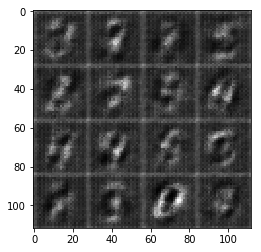

Epoch 1/2... Discriminator Loss: 0.7439... Generator Loss: 1.9623
Epoch 1/2... Discriminator Loss: 0.6612... Generator Loss: 1.7296
Epoch 1/2... Discriminator Loss: 0.9126... Generator Loss: 2.2836
Epoch 1/2... Discriminator Loss: 1.0394... Generator Loss: 0.5911
Epoch 1/2... Discriminator Loss: 0.5989... Generator Loss: 1.1541
Epoch 1/2... Discriminator Loss: 0.6452... Generator Loss: 1.2472
Epoch 1/2... Discriminator Loss: 1.6177... Generator Loss: 0.2761
Epoch 1/2... Discriminator Loss: 0.5996... Generator Loss: 1.5284
Epoch 1/2... Discriminator Loss: 0.6767... Generator Loss: 1.0936
Epoch 1/2... Discriminator Loss: 0.6394... Generator Loss: 1.4738


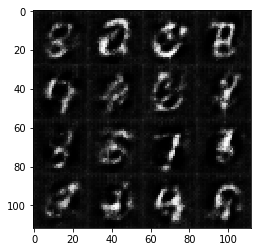

Epoch 1/2... Discriminator Loss: 0.5803... Generator Loss: 1.9747
Epoch 1/2... Discriminator Loss: 1.4568... Generator Loss: 0.3198
Epoch 1/2... Discriminator Loss: 0.5516... Generator Loss: 1.1636
Epoch 1/2... Discriminator Loss: 0.5145... Generator Loss: 2.0485
Epoch 1/2... Discriminator Loss: 0.8406... Generator Loss: 0.6834
Epoch 1/2... Discriminator Loss: 0.6530... Generator Loss: 0.9580
Epoch 1/2... Discriminator Loss: 0.6007... Generator Loss: 1.0544
Epoch 1/2... Discriminator Loss: 0.6909... Generator Loss: 3.2734
Epoch 1/2... Discriminator Loss: 0.5825... Generator Loss: 1.1340
Epoch 1/2... Discriminator Loss: 0.4563... Generator Loss: 1.5513


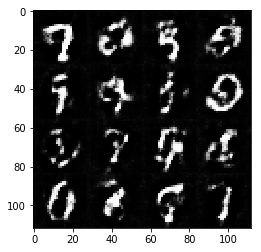

Epoch 1/2... Discriminator Loss: 0.5104... Generator Loss: 2.2320
Epoch 1/2... Discriminator Loss: 0.4097... Generator Loss: 1.7717
Epoch 1/2... Discriminator Loss: 0.4436... Generator Loss: 1.7953
Epoch 1/2... Discriminator Loss: 1.3146... Generator Loss: 0.4001
Epoch 1/2... Discriminator Loss: 0.5784... Generator Loss: 1.1015
Epoch 1/2... Discriminator Loss: 0.5649... Generator Loss: 1.1237
Epoch 1/2... Discriminator Loss: 0.4173... Generator Loss: 1.8321
Epoch 1/2... Discriminator Loss: 0.4441... Generator Loss: 2.0372
Epoch 1/2... Discriminator Loss: 0.3570... Generator Loss: 2.2832
Epoch 1/2... Discriminator Loss: 0.5539... Generator Loss: 1.1878


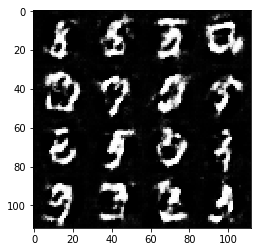

Epoch 1/2... Discriminator Loss: 0.3820... Generator Loss: 2.1873
Epoch 1/2... Discriminator Loss: 0.4242... Generator Loss: 2.0494
Epoch 1/2... Discriminator Loss: 0.4247... Generator Loss: 1.4871
Epoch 1/2... Discriminator Loss: 0.4411... Generator Loss: 1.4974
Epoch 1/2... Discriminator Loss: 0.4291... Generator Loss: 1.5098
Epoch 1/2... Discriminator Loss: 0.4543... Generator Loss: 2.1410
Epoch 1/2... Discriminator Loss: 0.4079... Generator Loss: 2.2267
Epoch 1/2... Discriminator Loss: 1.1515... Generator Loss: 0.5373
Epoch 1/2... Discriminator Loss: 0.8018... Generator Loss: 3.2401
Epoch 1/2... Discriminator Loss: 0.3884... Generator Loss: 2.0874


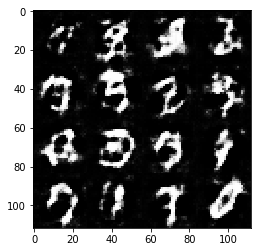

Epoch 1/2... Discriminator Loss: 0.6468... Generator Loss: 3.4423
Epoch 1/2... Discriminator Loss: 0.5411... Generator Loss: 1.3237
Epoch 1/2... Discriminator Loss: 0.3970... Generator Loss: 1.7841
Epoch 1/2... Discriminator Loss: 0.8039... Generator Loss: 0.8574
Epoch 1/2... Discriminator Loss: 0.5475... Generator Loss: 2.5759
Epoch 1/2... Discriminator Loss: 0.5342... Generator Loss: 1.3611
Epoch 1/2... Discriminator Loss: 0.4268... Generator Loss: 1.6148
Epoch 1/2... Discriminator Loss: 1.2186... Generator Loss: 2.8823
Epoch 1/2... Discriminator Loss: 1.0704... Generator Loss: 0.5551
Epoch 1/2... Discriminator Loss: 0.4709... Generator Loss: 3.0984


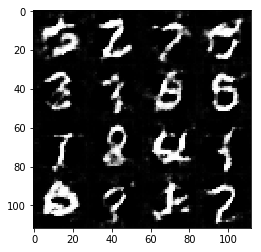

Epoch 1/2... Discriminator Loss: 0.7067... Generator Loss: 0.9319
Epoch 1/2... Discriminator Loss: 0.5750... Generator Loss: 2.1689
Epoch 1/2... Discriminator Loss: 0.9099... Generator Loss: 0.6774
Epoch 1/2... Discriminator Loss: 0.6585... Generator Loss: 1.0160
Epoch 1/2... Discriminator Loss: 0.5980... Generator Loss: 1.1361
Epoch 1/2... Discriminator Loss: 0.4983... Generator Loss: 1.5672
Epoch 1/2... Discriminator Loss: 0.7030... Generator Loss: 0.9348
Epoch 1/2... Discriminator Loss: 0.7441... Generator Loss: 0.9957
Epoch 1/2... Discriminator Loss: 0.4954... Generator Loss: 1.5545
Epoch 1/2... Discriminator Loss: 0.7351... Generator Loss: 0.8928


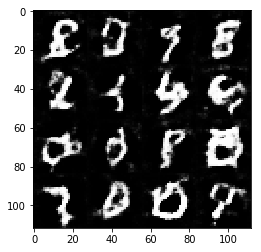

Epoch 1/2... Discriminator Loss: 0.5426... Generator Loss: 1.3914
Epoch 1/2... Discriminator Loss: 0.5121... Generator Loss: 1.2124
Epoch 1/2... Discriminator Loss: 0.5869... Generator Loss: 2.6598
Epoch 1/2... Discriminator Loss: 0.5697... Generator Loss: 1.6819
Epoch 1/2... Discriminator Loss: 0.5652... Generator Loss: 1.6872
Epoch 1/2... Discriminator Loss: 0.5149... Generator Loss: 1.3611
Epoch 1/2... Discriminator Loss: 0.5254... Generator Loss: 2.2182
Epoch 1/2... Discriminator Loss: 0.8263... Generator Loss: 0.7778
Epoch 1/2... Discriminator Loss: 0.4012... Generator Loss: 1.8842
Epoch 1/2... Discriminator Loss: 0.4078... Generator Loss: 1.8501


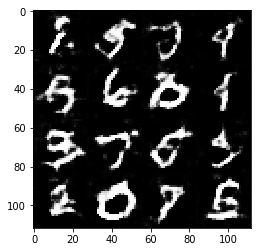

Epoch 1/2... Discriminator Loss: 0.6211... Generator Loss: 1.2571
Epoch 1/2... Discriminator Loss: 0.6219... Generator Loss: 1.0088
Epoch 1/2... Discriminator Loss: 0.4624... Generator Loss: 1.4997
Epoch 1/2... Discriminator Loss: 0.5279... Generator Loss: 1.4589
Epoch 1/2... Discriminator Loss: 0.3418... Generator Loss: 2.4715
Epoch 1/2... Discriminator Loss: 0.5263... Generator Loss: 1.2910
Epoch 1/2... Discriminator Loss: 0.4334... Generator Loss: 1.8550
Epoch 1/2... Discriminator Loss: 0.4587... Generator Loss: 2.3858
Epoch 1/2... Discriminator Loss: 0.5709... Generator Loss: 1.0859
Epoch 1/2... Discriminator Loss: 1.6480... Generator Loss: 3.9290


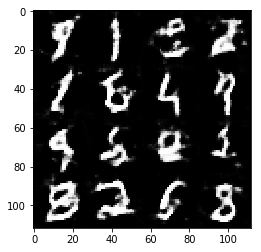

Epoch 1/2... Discriminator Loss: 0.4408... Generator Loss: 1.6668
Epoch 1/2... Discriminator Loss: 0.5936... Generator Loss: 1.1161
Epoch 1/2... Discriminator Loss: 1.1119... Generator Loss: 0.5005
Epoch 2/2... Discriminator Loss: 0.3824... Generator Loss: 1.7169
Epoch 2/2... Discriminator Loss: 0.4874... Generator Loss: 1.3472
Epoch 2/2... Discriminator Loss: 0.4355... Generator Loss: 1.5505
Epoch 2/2... Discriminator Loss: 0.7013... Generator Loss: 0.9265
Epoch 2/2... Discriminator Loss: 0.4504... Generator Loss: 1.6669
Epoch 2/2... Discriminator Loss: 0.5414... Generator Loss: 1.4841
Epoch 2/2... Discriminator Loss: 0.8918... Generator Loss: 2.5460


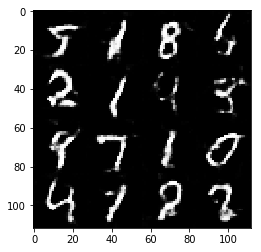

Epoch 2/2... Discriminator Loss: 0.4354... Generator Loss: 2.0704
Epoch 2/2... Discriminator Loss: 0.5322... Generator Loss: 1.2122
Epoch 2/2... Discriminator Loss: 0.4943... Generator Loss: 1.2573
Epoch 2/2... Discriminator Loss: 0.4209... Generator Loss: 1.6237
Epoch 2/2... Discriminator Loss: 0.4768... Generator Loss: 1.7281
Epoch 2/2... Discriminator Loss: 0.4528... Generator Loss: 1.4160
Epoch 2/2... Discriminator Loss: 0.6278... Generator Loss: 2.5531
Epoch 2/2... Discriminator Loss: 0.4210... Generator Loss: 1.6508
Epoch 2/2... Discriminator Loss: 0.4433... Generator Loss: 1.3228
Epoch 2/2... Discriminator Loss: 0.5045... Generator Loss: 1.2929


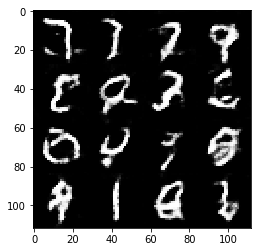

Epoch 2/2... Discriminator Loss: 0.5498... Generator Loss: 1.3477
Epoch 2/2... Discriminator Loss: 0.4004... Generator Loss: 1.6321
Epoch 2/2... Discriminator Loss: 0.4615... Generator Loss: 1.5423
Epoch 2/2... Discriminator Loss: 0.6232... Generator Loss: 1.0394
Epoch 2/2... Discriminator Loss: 0.3385... Generator Loss: 1.9812
Epoch 2/2... Discriminator Loss: 0.4943... Generator Loss: 1.2678
Epoch 2/2... Discriminator Loss: 0.3817... Generator Loss: 1.5731
Epoch 2/2... Discriminator Loss: 7.7349... Generator Loss: 9.6661
Epoch 2/2... Discriminator Loss: 0.8407... Generator Loss: 2.1559
Epoch 2/2... Discriminator Loss: 0.6281... Generator Loss: 1.4337


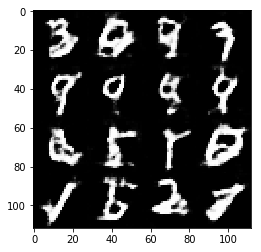

Epoch 2/2... Discriminator Loss: 0.5415... Generator Loss: 1.5601
Epoch 2/2... Discriminator Loss: 0.3986... Generator Loss: 2.1097
Epoch 2/2... Discriminator Loss: 0.4139... Generator Loss: 1.4813
Epoch 2/2... Discriminator Loss: 0.4397... Generator Loss: 1.4270
Epoch 2/2... Discriminator Loss: 0.5584... Generator Loss: 1.1554
Epoch 2/2... Discriminator Loss: 1.0777... Generator Loss: 0.5478
Epoch 2/2... Discriminator Loss: 0.4578... Generator Loss: 1.4739
Epoch 2/2... Discriminator Loss: 0.4717... Generator Loss: 1.3037
Epoch 2/2... Discriminator Loss: 0.5659... Generator Loss: 1.1455
Epoch 2/2... Discriminator Loss: 0.3969... Generator Loss: 1.4038


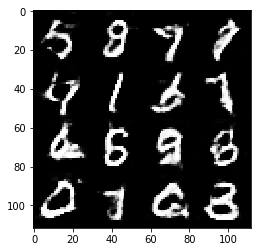

Epoch 2/2... Discriminator Loss: 0.9625... Generator Loss: 0.6132
Epoch 2/2... Discriminator Loss: 0.4235... Generator Loss: 1.3004
Epoch 2/2... Discriminator Loss: 0.3920... Generator Loss: 1.8677
Epoch 2/2... Discriminator Loss: 0.5991... Generator Loss: 1.2502
Epoch 2/2... Discriminator Loss: 0.4683... Generator Loss: 1.9821
Epoch 2/2... Discriminator Loss: 1.1261... Generator Loss: 3.4145
Epoch 2/2... Discriminator Loss: 0.8015... Generator Loss: 0.9300
Epoch 2/2... Discriminator Loss: 0.4404... Generator Loss: 1.4611
Epoch 2/2... Discriminator Loss: 0.5307... Generator Loss: 1.1912
Epoch 2/2... Discriminator Loss: 0.5324... Generator Loss: 1.1698


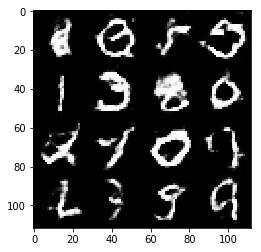

Epoch 2/2... Discriminator Loss: 0.4236... Generator Loss: 1.4476
Epoch 2/2... Discriminator Loss: 0.4703... Generator Loss: 1.3602
Epoch 2/2... Discriminator Loss: 0.3288... Generator Loss: 1.6859
Epoch 2/2... Discriminator Loss: 0.4750... Generator Loss: 1.2507
Epoch 2/2... Discriminator Loss: 0.6286... Generator Loss: 1.0925
Epoch 2/2... Discriminator Loss: 0.4195... Generator Loss: 1.3991
Epoch 2/2... Discriminator Loss: 0.3506... Generator Loss: 1.6447
Epoch 2/2... Discriminator Loss: 0.4067... Generator Loss: 1.4637
Epoch 2/2... Discriminator Loss: 0.4069... Generator Loss: 1.3951
Epoch 2/2... Discriminator Loss: 0.4432... Generator Loss: 1.4051


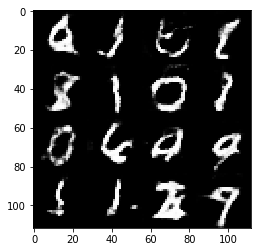

Epoch 2/2... Discriminator Loss: 0.3594... Generator Loss: 1.6741
Epoch 2/2... Discriminator Loss: 0.5707... Generator Loss: 1.1014
Epoch 2/2... Discriminator Loss: 0.6015... Generator Loss: 1.0845
Epoch 2/2... Discriminator Loss: 0.4725... Generator Loss: 1.3058
Epoch 2/2... Discriminator Loss: 0.2919... Generator Loss: 1.8597
Epoch 2/2... Discriminator Loss: 1.1409... Generator Loss: 0.7963
Epoch 2/2... Discriminator Loss: 0.6116... Generator Loss: 1.4470
Epoch 2/2... Discriminator Loss: 1.1197... Generator Loss: 0.5419
Epoch 2/2... Discriminator Loss: 0.4258... Generator Loss: 2.0447
Epoch 2/2... Discriminator Loss: 0.3614... Generator Loss: 1.7116


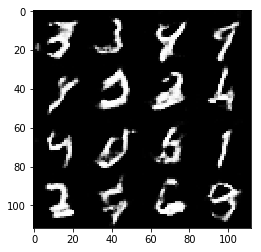

Epoch 2/2... Discriminator Loss: 0.4242... Generator Loss: 1.7420
Epoch 2/2... Discriminator Loss: 0.5714... Generator Loss: 1.1381
Epoch 2/2... Discriminator Loss: 0.3614... Generator Loss: 1.6439
Epoch 2/2... Discriminator Loss: 0.8611... Generator Loss: 0.7316
Epoch 2/2... Discriminator Loss: 0.4004... Generator Loss: 1.5010
Epoch 2/2... Discriminator Loss: 0.4956... Generator Loss: 1.1930
Epoch 2/2... Discriminator Loss: 0.6303... Generator Loss: 1.0345
Epoch 2/2... Discriminator Loss: 0.3436... Generator Loss: 2.3152
Epoch 2/2... Discriminator Loss: 0.6376... Generator Loss: 1.0373
Epoch 2/2... Discriminator Loss: 0.3057... Generator Loss: 1.8662


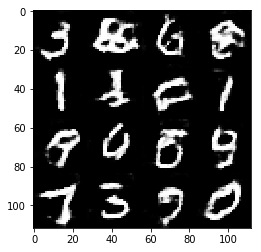

Epoch 2/2... Discriminator Loss: 0.4383... Generator Loss: 1.3769
Epoch 2/2... Discriminator Loss: 0.5073... Generator Loss: 1.1543
Epoch 2/2... Discriminator Loss: 0.5938... Generator Loss: 1.0664
Epoch 2/2... Discriminator Loss: 0.2847... Generator Loss: 1.9115
Epoch 2/2... Discriminator Loss: 0.5611... Generator Loss: 1.1092
Epoch 2/2... Discriminator Loss: 1.5320... Generator Loss: 0.3094
Epoch 2/2... Discriminator Loss: 1.1708... Generator Loss: 0.5371
Epoch 2/2... Discriminator Loss: 0.6273... Generator Loss: 1.1847
Epoch 2/2... Discriminator Loss: 0.9267... Generator Loss: 2.8146
Epoch 2/2... Discriminator Loss: 0.3567... Generator Loss: 2.1303


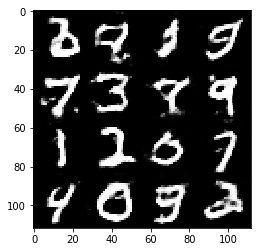

Epoch 2/2... Discriminator Loss: 0.3413... Generator Loss: 1.7267
Epoch 2/2... Discriminator Loss: 0.3889... Generator Loss: 1.4527
Epoch 2/2... Discriminator Loss: 0.3047... Generator Loss: 2.0135
Epoch 2/2... Discriminator Loss: 0.3656... Generator Loss: 1.6651
Epoch 2/2... Discriminator Loss: 0.2780... Generator Loss: 1.8660
Epoch 2/2... Discriminator Loss: 0.6874... Generator Loss: 0.9570
Epoch 2/2... Discriminator Loss: 0.6379... Generator Loss: 1.0236


In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.1498... Generator Loss: 2.4009
Epoch 1/1... Discriminator Loss: 0.5380... Generator Loss: 1.2912
Epoch 1/1... Discriminator Loss: 0.1691... Generator Loss: 3.5242
Epoch 1/1... Discriminator Loss: 0.2296... Generator Loss: 8.7354
Epoch 1/1... Discriminator Loss: 0.7020... Generator Loss: 3.6086
Epoch 1/1... Discriminator Loss: 0.6311... Generator Loss: 4.6194
Epoch 1/1... Discriminator Loss: 0.7268... Generator Loss: 1.0393
Epoch 1/1... Discriminator Loss: 0.9713... Generator Loss: 1.1213
Epoch 1/1... Discriminator Loss: 0.6561... Generator Loss: 2.1118
Epoch 1/1... Discriminator Loss: 0.6344... Generator Loss: 1.3357


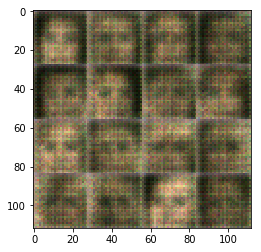

Epoch 1/1... Discriminator Loss: 0.5821... Generator Loss: 1.7365
Epoch 1/1... Discriminator Loss: 1.9499... Generator Loss: 0.2752
Epoch 1/1... Discriminator Loss: 0.7861... Generator Loss: 1.5911
Epoch 1/1... Discriminator Loss: 0.7116... Generator Loss: 1.2876
Epoch 1/1... Discriminator Loss: 1.0564... Generator Loss: 0.6427
Epoch 1/1... Discriminator Loss: 0.9564... Generator Loss: 2.2978
Epoch 1/1... Discriminator Loss: 0.5871... Generator Loss: 1.6124
Epoch 1/1... Discriminator Loss: 0.9682... Generator Loss: 0.8586
Epoch 1/1... Discriminator Loss: 0.5777... Generator Loss: 1.5670
Epoch 1/1... Discriminator Loss: 0.8541... Generator Loss: 0.8682


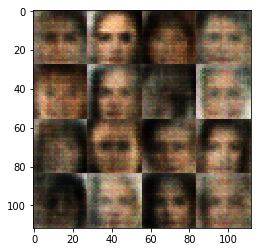

Epoch 1/1... Discriminator Loss: 0.8372... Generator Loss: 0.9060
Epoch 1/1... Discriminator Loss: 0.6886... Generator Loss: 1.6754
Epoch 1/1... Discriminator Loss: 0.7465... Generator Loss: 1.2436
Epoch 1/1... Discriminator Loss: 0.8216... Generator Loss: 1.1510
Epoch 1/1... Discriminator Loss: 0.8579... Generator Loss: 0.8829
Epoch 1/1... Discriminator Loss: 0.6304... Generator Loss: 1.2073
Epoch 1/1... Discriminator Loss: 0.6946... Generator Loss: 1.0595
Epoch 1/1... Discriminator Loss: 0.7190... Generator Loss: 1.2168
Epoch 1/1... Discriminator Loss: 0.7809... Generator Loss: 1.3495
Epoch 1/1... Discriminator Loss: 0.6627... Generator Loss: 1.2822


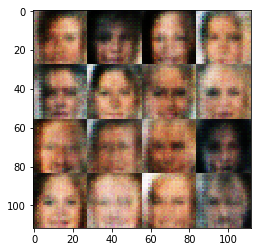

Epoch 1/1... Discriminator Loss: 0.4588... Generator Loss: 1.7667
Epoch 1/1... Discriminator Loss: 0.8634... Generator Loss: 1.1875
Epoch 1/1... Discriminator Loss: 1.0425... Generator Loss: 0.8141
Epoch 1/1... Discriminator Loss: 1.1223... Generator Loss: 0.6083
Epoch 1/1... Discriminator Loss: 0.9537... Generator Loss: 0.7322
Epoch 1/1... Discriminator Loss: 1.1033... Generator Loss: 2.9041
Epoch 1/1... Discriminator Loss: 1.1782... Generator Loss: 2.1201
Epoch 1/1... Discriminator Loss: 1.1756... Generator Loss: 0.5222
Epoch 1/1... Discriminator Loss: 1.2027... Generator Loss: 1.5035
Epoch 1/1... Discriminator Loss: 0.9003... Generator Loss: 1.4278


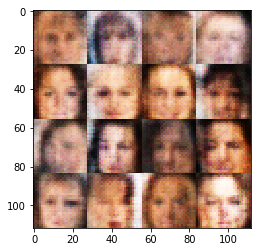

Epoch 1/1... Discriminator Loss: 0.8291... Generator Loss: 1.1644
Epoch 1/1... Discriminator Loss: 0.9973... Generator Loss: 0.9055
Epoch 1/1... Discriminator Loss: 1.0291... Generator Loss: 1.6936
Epoch 1/1... Discriminator Loss: 0.7500... Generator Loss: 1.1499
Epoch 1/1... Discriminator Loss: 1.2017... Generator Loss: 0.5767
Epoch 1/1... Discriminator Loss: 1.1287... Generator Loss: 0.6164
Epoch 1/1... Discriminator Loss: 1.0620... Generator Loss: 0.8173
Epoch 1/1... Discriminator Loss: 0.9369... Generator Loss: 1.0113
Epoch 1/1... Discriminator Loss: 1.1016... Generator Loss: 1.3457
Epoch 1/1... Discriminator Loss: 1.4711... Generator Loss: 0.3693


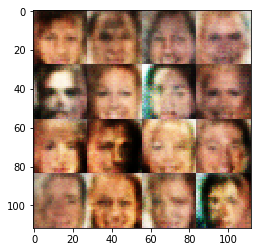

Epoch 1/1... Discriminator Loss: 0.9971... Generator Loss: 1.3506
Epoch 1/1... Discriminator Loss: 0.9990... Generator Loss: 0.7932
Epoch 1/1... Discriminator Loss: 1.3734... Generator Loss: 0.3855
Epoch 1/1... Discriminator Loss: 1.0647... Generator Loss: 0.7733
Epoch 1/1... Discriminator Loss: 1.0624... Generator Loss: 0.6182
Epoch 1/1... Discriminator Loss: 1.1053... Generator Loss: 0.7794
Epoch 1/1... Discriminator Loss: 0.9754... Generator Loss: 0.7959
Epoch 1/1... Discriminator Loss: 1.0705... Generator Loss: 0.8356
Epoch 1/1... Discriminator Loss: 1.1205... Generator Loss: 1.7692
Epoch 1/1... Discriminator Loss: 1.1298... Generator Loss: 0.6531


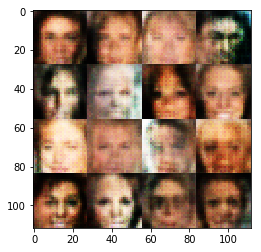

Epoch 1/1... Discriminator Loss: 1.0095... Generator Loss: 0.6809
Epoch 1/1... Discriminator Loss: 1.1558... Generator Loss: 0.5542
Epoch 1/1... Discriminator Loss: 1.0334... Generator Loss: 1.7672
Epoch 1/1... Discriminator Loss: 1.3994... Generator Loss: 0.4064
Epoch 1/1... Discriminator Loss: 0.8799... Generator Loss: 1.1602
Epoch 1/1... Discriminator Loss: 0.9858... Generator Loss: 1.3772
Epoch 1/1... Discriminator Loss: 1.0438... Generator Loss: 0.6634
Epoch 1/1... Discriminator Loss: 1.0844... Generator Loss: 0.7407
Epoch 1/1... Discriminator Loss: 1.0769... Generator Loss: 0.6397
Epoch 1/1... Discriminator Loss: 1.3047... Generator Loss: 0.4606


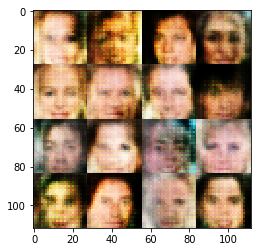

Epoch 1/1... Discriminator Loss: 1.2095... Generator Loss: 0.4781
Epoch 1/1... Discriminator Loss: 0.8901... Generator Loss: 1.0643
Epoch 1/1... Discriminator Loss: 1.1952... Generator Loss: 1.5870
Epoch 1/1... Discriminator Loss: 0.8945... Generator Loss: 1.0467
Epoch 1/1... Discriminator Loss: 1.1486... Generator Loss: 0.6717
Epoch 1/1... Discriminator Loss: 1.0485... Generator Loss: 0.8497
Epoch 1/1... Discriminator Loss: 1.0853... Generator Loss: 0.5818
Epoch 1/1... Discriminator Loss: 1.0342... Generator Loss: 0.6229
Epoch 1/1... Discriminator Loss: 0.9926... Generator Loss: 1.5870
Epoch 1/1... Discriminator Loss: 0.8285... Generator Loss: 1.8013


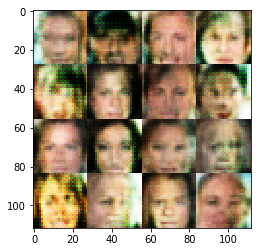

Epoch 1/1... Discriminator Loss: 0.9320... Generator Loss: 1.3081
Epoch 1/1... Discriminator Loss: 0.9523... Generator Loss: 0.8416
Epoch 1/1... Discriminator Loss: 0.8195... Generator Loss: 1.1134
Epoch 1/1... Discriminator Loss: 0.9289... Generator Loss: 0.7815
Epoch 1/1... Discriminator Loss: 0.9706... Generator Loss: 0.8227
Epoch 1/1... Discriminator Loss: 1.2746... Generator Loss: 0.5428
Epoch 1/1... Discriminator Loss: 1.0149... Generator Loss: 0.7656
Epoch 1/1... Discriminator Loss: 1.0086... Generator Loss: 0.9714
Epoch 1/1... Discriminator Loss: 0.9739... Generator Loss: 1.5240
Epoch 1/1... Discriminator Loss: 0.9841... Generator Loss: 0.6411


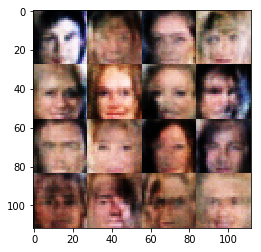

Epoch 1/1... Discriminator Loss: 1.2735... Generator Loss: 0.4901
Epoch 1/1... Discriminator Loss: 1.1514... Generator Loss: 0.5210
Epoch 1/1... Discriminator Loss: 0.9712... Generator Loss: 0.6553
Epoch 1/1... Discriminator Loss: 0.9975... Generator Loss: 0.7121
Epoch 1/1... Discriminator Loss: 1.1554... Generator Loss: 0.5634
Epoch 1/1... Discriminator Loss: 1.3800... Generator Loss: 0.4180
Epoch 1/1... Discriminator Loss: 1.0130... Generator Loss: 0.9099
Epoch 1/1... Discriminator Loss: 0.8526... Generator Loss: 0.9396
Epoch 1/1... Discriminator Loss: 1.0588... Generator Loss: 0.9693
Epoch 1/1... Discriminator Loss: 1.0622... Generator Loss: 0.8160


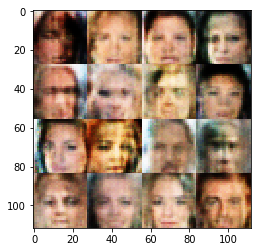

Epoch 1/1... Discriminator Loss: 0.7930... Generator Loss: 1.2556
Epoch 1/1... Discriminator Loss: 0.9944... Generator Loss: 1.6854
Epoch 1/1... Discriminator Loss: 1.2165... Generator Loss: 1.7389
Epoch 1/1... Discriminator Loss: 1.1371... Generator Loss: 0.5645
Epoch 1/1... Discriminator Loss: 1.1957... Generator Loss: 0.6202
Epoch 1/1... Discriminator Loss: 0.8143... Generator Loss: 1.2029
Epoch 1/1... Discriminator Loss: 1.0321... Generator Loss: 0.6770
Epoch 1/1... Discriminator Loss: 0.9261... Generator Loss: 0.8432
Epoch 1/1... Discriminator Loss: 0.6390... Generator Loss: 1.1114
Epoch 1/1... Discriminator Loss: 1.1123... Generator Loss: 0.5643


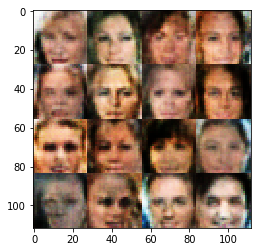

Epoch 1/1... Discriminator Loss: 0.6957... Generator Loss: 1.6957
Epoch 1/1... Discriminator Loss: 0.8943... Generator Loss: 0.8148
Epoch 1/1... Discriminator Loss: 0.9436... Generator Loss: 0.7746
Epoch 1/1... Discriminator Loss: 1.0874... Generator Loss: 0.5829
Epoch 1/1... Discriminator Loss: 0.7701... Generator Loss: 1.7310
Epoch 1/1... Discriminator Loss: 1.1891... Generator Loss: 1.9318
Epoch 1/1... Discriminator Loss: 0.7423... Generator Loss: 1.5662
Epoch 1/1... Discriminator Loss: 0.6835... Generator Loss: 1.3579
Epoch 1/1... Discriminator Loss: 0.8716... Generator Loss: 0.8189
Epoch 1/1... Discriminator Loss: 0.9602... Generator Loss: 0.8300


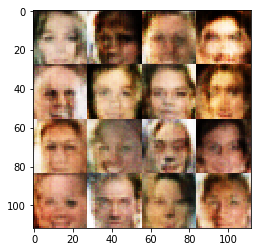

Epoch 1/1... Discriminator Loss: 1.4551... Generator Loss: 0.3365
Epoch 1/1... Discriminator Loss: 0.8476... Generator Loss: 1.0857
Epoch 1/1... Discriminator Loss: 1.3591... Generator Loss: 0.4549
Epoch 1/1... Discriminator Loss: 0.9996... Generator Loss: 2.0256
Epoch 1/1... Discriminator Loss: 0.8887... Generator Loss: 0.7209
Epoch 1/1... Discriminator Loss: 0.7544... Generator Loss: 1.0376
Epoch 1/1... Discriminator Loss: 1.0473... Generator Loss: 0.6276
Epoch 1/1... Discriminator Loss: 1.0072... Generator Loss: 0.5961
Epoch 1/1... Discriminator Loss: 0.8697... Generator Loss: 0.7972
Epoch 1/1... Discriminator Loss: 0.6772... Generator Loss: 2.0130


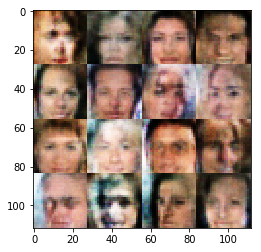

Epoch 1/1... Discriminator Loss: 1.0955... Generator Loss: 0.7314
Epoch 1/1... Discriminator Loss: 0.8293... Generator Loss: 1.6310
Epoch 1/1... Discriminator Loss: 1.3055... Generator Loss: 0.4535
Epoch 1/1... Discriminator Loss: 0.7164... Generator Loss: 1.1697
Epoch 1/1... Discriminator Loss: 0.8057... Generator Loss: 1.0754
Epoch 1/1... Discriminator Loss: 1.3959... Generator Loss: 1.0392
Epoch 1/1... Discriminator Loss: 1.0695... Generator Loss: 0.9935
Epoch 1/1... Discriminator Loss: 1.0403... Generator Loss: 0.7502
Epoch 1/1... Discriminator Loss: 1.4229... Generator Loss: 0.3806
Epoch 1/1... Discriminator Loss: 0.9361... Generator Loss: 0.8261


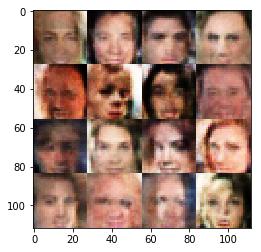

Epoch 1/1... Discriminator Loss: 0.8146... Generator Loss: 1.0887
Epoch 1/1... Discriminator Loss: 0.9295... Generator Loss: 0.7906
Epoch 1/1... Discriminator Loss: 0.9350... Generator Loss: 0.8560
Epoch 1/1... Discriminator Loss: 0.6698... Generator Loss: 1.5731
Epoch 1/1... Discriminator Loss: 1.1240... Generator Loss: 0.5922
Epoch 1/1... Discriminator Loss: 1.0061... Generator Loss: 0.6177
Epoch 1/1... Discriminator Loss: 1.1866... Generator Loss: 0.5652
Epoch 1/1... Discriminator Loss: 0.8328... Generator Loss: 0.9091
Epoch 1/1... Discriminator Loss: 1.2516... Generator Loss: 0.5031
Epoch 1/1... Discriminator Loss: 0.8312... Generator Loss: 1.3100


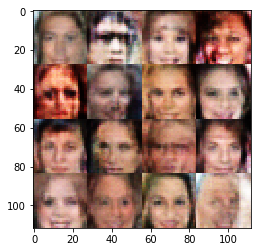

Epoch 1/1... Discriminator Loss: 0.7063... Generator Loss: 1.1887
Epoch 1/1... Discriminator Loss: 0.9002... Generator Loss: 1.8399
Epoch 1/1... Discriminator Loss: 0.5686... Generator Loss: 1.1656
Epoch 1/1... Discriminator Loss: 0.8840... Generator Loss: 0.7326
Epoch 1/1... Discriminator Loss: 0.6982... Generator Loss: 1.0743
Epoch 1/1... Discriminator Loss: 0.7769... Generator Loss: 1.9789
Epoch 1/1... Discriminator Loss: 0.9954... Generator Loss: 0.6712
Epoch 1/1... Discriminator Loss: 0.8055... Generator Loss: 1.4237
Epoch 1/1... Discriminator Loss: 0.9359... Generator Loss: 0.6980
Epoch 1/1... Discriminator Loss: 0.9652... Generator Loss: 0.8173


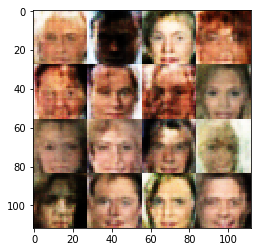

Epoch 1/1... Discriminator Loss: 0.9723... Generator Loss: 0.7012
Epoch 1/1... Discriminator Loss: 0.8139... Generator Loss: 0.8331
Epoch 1/1... Discriminator Loss: 0.7501... Generator Loss: 0.9036
Epoch 1/1... Discriminator Loss: 0.7690... Generator Loss: 1.3382
Epoch 1/1... Discriminator Loss: 1.1492... Generator Loss: 2.1045
Epoch 1/1... Discriminator Loss: 0.9395... Generator Loss: 0.7983
Epoch 1/1... Discriminator Loss: 0.6855... Generator Loss: 1.1120
Epoch 1/1... Discriminator Loss: 0.6443... Generator Loss: 1.5611
Epoch 1/1... Discriminator Loss: 1.1817... Generator Loss: 0.4874
Epoch 1/1... Discriminator Loss: 1.3742... Generator Loss: 0.4321


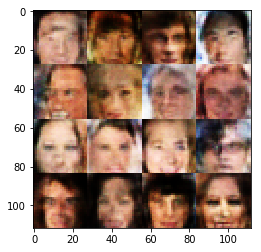

Epoch 1/1... Discriminator Loss: 1.0638... Generator Loss: 1.2918
Epoch 1/1... Discriminator Loss: 0.8866... Generator Loss: 0.7287
Epoch 1/1... Discriminator Loss: 1.1098... Generator Loss: 0.7373
Epoch 1/1... Discriminator Loss: 1.0141... Generator Loss: 0.9861
Epoch 1/1... Discriminator Loss: 0.9635... Generator Loss: 0.7083
Epoch 1/1... Discriminator Loss: 1.0389... Generator Loss: 1.5550
Epoch 1/1... Discriminator Loss: 1.0264... Generator Loss: 0.7036
Epoch 1/1... Discriminator Loss: 1.2650... Generator Loss: 0.4665
Epoch 1/1... Discriminator Loss: 0.6837... Generator Loss: 1.2012
Epoch 1/1... Discriminator Loss: 0.5918... Generator Loss: 1.1888


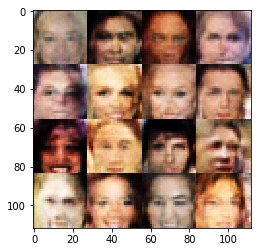

Epoch 1/1... Discriminator Loss: 0.4370... Generator Loss: 1.5922
Epoch 1/1... Discriminator Loss: 0.9901... Generator Loss: 0.8930
Epoch 1/1... Discriminator Loss: 0.6444... Generator Loss: 1.3601
Epoch 1/1... Discriminator Loss: 0.9916... Generator Loss: 0.6026
Epoch 1/1... Discriminator Loss: 0.9923... Generator Loss: 0.6392
Epoch 1/1... Discriminator Loss: 1.4429... Generator Loss: 0.3410
Epoch 1/1... Discriminator Loss: 0.7929... Generator Loss: 2.4937
Epoch 1/1... Discriminator Loss: 0.7663... Generator Loss: 0.9775
Epoch 1/1... Discriminator Loss: 0.7994... Generator Loss: 1.1052
Epoch 1/1... Discriminator Loss: 1.0281... Generator Loss: 0.6016


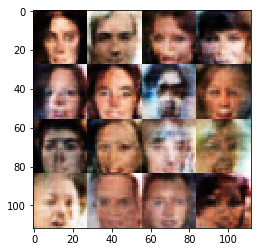

Epoch 1/1... Discriminator Loss: 0.3382... Generator Loss: 1.7902
Epoch 1/1... Discriminator Loss: 0.4378... Generator Loss: 2.2076
Epoch 1/1... Discriminator Loss: 1.5665... Generator Loss: 0.3027
Epoch 1/1... Discriminator Loss: 1.4617... Generator Loss: 0.3655
Epoch 1/1... Discriminator Loss: 0.7448... Generator Loss: 0.9476
Epoch 1/1... Discriminator Loss: 0.9031... Generator Loss: 0.7762
Epoch 1/1... Discriminator Loss: 0.5688... Generator Loss: 1.0650
Epoch 1/1... Discriminator Loss: 0.3796... Generator Loss: 2.4475
Epoch 1/1... Discriminator Loss: 0.5088... Generator Loss: 1.1269
Epoch 1/1... Discriminator Loss: 0.9676... Generator Loss: 0.5859


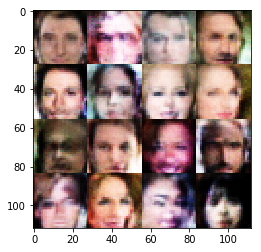

Epoch 1/1... Discriminator Loss: 0.3851... Generator Loss: 2.4484
Epoch 1/1... Discriminator Loss: 0.1498... Generator Loss: 3.1261
Epoch 1/1... Discriminator Loss: 0.3309... Generator Loss: 1.7839
Epoch 1/1... Discriminator Loss: 0.3509... Generator Loss: 2.5672
Epoch 1/1... Discriminator Loss: 1.8724... Generator Loss: 5.0816
Epoch 1/1... Discriminator Loss: 0.7705... Generator Loss: 0.8121
Epoch 1/1... Discriminator Loss: 0.9905... Generator Loss: 0.6322
Epoch 1/1... Discriminator Loss: 1.6429... Generator Loss: 0.2708
Epoch 1/1... Discriminator Loss: 0.4180... Generator Loss: 4.3760
Epoch 1/1... Discriminator Loss: 1.0941... Generator Loss: 0.5150


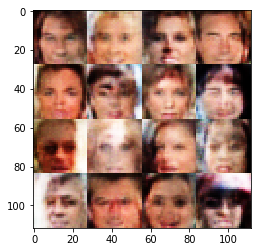

Epoch 1/1... Discriminator Loss: 0.1492... Generator Loss: 5.1729
Epoch 1/1... Discriminator Loss: 0.9129... Generator Loss: 0.6691
Epoch 1/1... Discriminator Loss: 0.2597... Generator Loss: 2.4666
Epoch 1/1... Discriminator Loss: 0.7720... Generator Loss: 0.8322
Epoch 1/1... Discriminator Loss: 0.1736... Generator Loss: 3.2890
Epoch 1/1... Discriminator Loss: 0.6975... Generator Loss: 0.9414
Epoch 1/1... Discriminator Loss: 1.4469... Generator Loss: 0.3376
Epoch 1/1... Discriminator Loss: 0.2172... Generator Loss: 2.1020
Epoch 1/1... Discriminator Loss: 0.4780... Generator Loss: 8.2015
Epoch 1/1... Discriminator Loss: 0.0527... Generator Loss: 4.2469


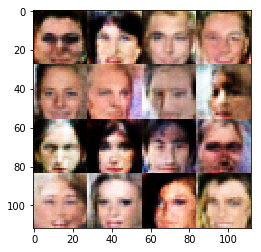

Epoch 1/1... Discriminator Loss: 0.0491... Generator Loss: 7.2364
Epoch 1/1... Discriminator Loss: 0.4454... Generator Loss: 1.2248
Epoch 1/1... Discriminator Loss: 0.1711... Generator Loss: 2.2890
Epoch 1/1... Discriminator Loss: 0.1643... Generator Loss: 2.5530
Epoch 1/1... Discriminator Loss: 2.1431... Generator Loss: 0.2227
Epoch 1/1... Discriminator Loss: 0.0734... Generator Loss: 5.2279
Epoch 1/1... Discriminator Loss: 0.1285... Generator Loss: 2.5802
Epoch 1/1... Discriminator Loss: 0.1292... Generator Loss: 6.0930
Epoch 1/1... Discriminator Loss: 0.0642... Generator Loss: 3.5880
Epoch 1/1... Discriminator Loss: 0.0947... Generator Loss: 5.9292


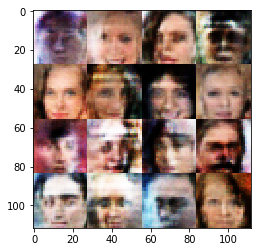

Epoch 1/1... Discriminator Loss: 0.7617... Generator Loss: 3.8278
Epoch 1/1... Discriminator Loss: 0.1236... Generator Loss: 6.7036
Epoch 1/1... Discriminator Loss: 0.6311... Generator Loss: 0.9809
Epoch 1/1... Discriminator Loss: 0.4507... Generator Loss: 4.2755
Epoch 1/1... Discriminator Loss: 0.4213... Generator Loss: 1.5293
Epoch 1/1... Discriminator Loss: 0.1292... Generator Loss: 2.6720
Epoch 1/1... Discriminator Loss: 1.0364... Generator Loss: 0.5425
Epoch 1/1... Discriminator Loss: 0.1625... Generator Loss: 2.4260
Epoch 1/1... Discriminator Loss: 0.0857... Generator Loss: 5.3466
Epoch 1/1... Discriminator Loss: 0.4731... Generator Loss: 1.3971


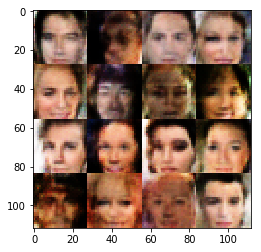

Epoch 1/1... Discriminator Loss: 1.5189... Generator Loss: 0.3089
Epoch 1/1... Discriminator Loss: 0.0806... Generator Loss: 3.2105
Epoch 1/1... Discriminator Loss: 0.6057... Generator Loss: 1.0130
Epoch 1/1... Discriminator Loss: 0.2521... Generator Loss: 3.5890
Epoch 1/1... Discriminator Loss: 0.2820... Generator Loss: 1.7183
Epoch 1/1... Discriminator Loss: 0.2686... Generator Loss: 1.9210
Epoch 1/1... Discriminator Loss: 0.0527... Generator Loss: 4.6344
Epoch 1/1... Discriminator Loss: 1.0384... Generator Loss: 0.5806
Epoch 1/1... Discriminator Loss: 0.2038... Generator Loss: 1.9887
Epoch 1/1... Discriminator Loss: 0.1457... Generator Loss: 3.4133


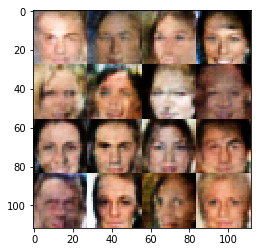

Epoch 1/1... Discriminator Loss: 0.1204... Generator Loss: 3.2496
Epoch 1/1... Discriminator Loss: 0.7781... Generator Loss: 0.7593
Epoch 1/1... Discriminator Loss: 0.0205... Generator Loss: 5.0256
Epoch 1/1... Discriminator Loss: 0.1142... Generator Loss: 5.3033
Epoch 1/1... Discriminator Loss: 0.0333... Generator Loss: 5.3672
Epoch 1/1... Discriminator Loss: 0.0811... Generator Loss: 4.5718
Epoch 1/1... Discriminator Loss: 0.5729... Generator Loss: 1.0646
Epoch 1/1... Discriminator Loss: 0.1451... Generator Loss: 2.6244
Epoch 1/1... Discriminator Loss: 0.1732... Generator Loss: 8.8395
Epoch 1/1... Discriminator Loss: 0.0956... Generator Loss: 5.7280


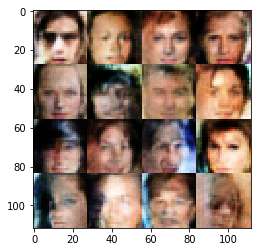

Epoch 1/1... Discriminator Loss: 0.2340... Generator Loss: 5.8853
Epoch 1/1... Discriminator Loss: 0.1548... Generator Loss: 2.5127
Epoch 1/1... Discriminator Loss: 0.0585... Generator Loss: 4.4313
Epoch 1/1... Discriminator Loss: 0.0253... Generator Loss: 7.1332
Epoch 1/1... Discriminator Loss: 0.8644... Generator Loss: 0.6675
Epoch 1/1... Discriminator Loss: 0.0859... Generator Loss: 3.2394
Epoch 1/1... Discriminator Loss: 0.1065... Generator Loss: 5.9552
Epoch 1/1... Discriminator Loss: 1.5315... Generator Loss: 2.0510
Epoch 1/1... Discriminator Loss: 1.2104... Generator Loss: 0.5109
Epoch 1/1... Discriminator Loss: 0.1940... Generator Loss: 2.8428


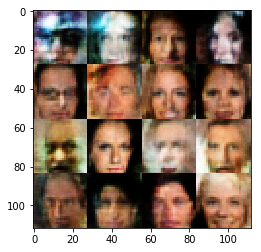

Epoch 1/1... Discriminator Loss: 0.2174... Generator Loss: 2.0033
Epoch 1/1... Discriminator Loss: 0.0902... Generator Loss: 3.2655
Epoch 1/1... Discriminator Loss: 0.0792... Generator Loss: 5.8397
Epoch 1/1... Discriminator Loss: 0.0666... Generator Loss: 5.3867
Epoch 1/1... Discriminator Loss: 0.1086... Generator Loss: 7.2770
Epoch 1/1... Discriminator Loss: 0.0697... Generator Loss: 5.4113
Epoch 1/1... Discriminator Loss: 0.1901... Generator Loss: 2.9988
Epoch 1/1... Discriminator Loss: 0.2206... Generator Loss: 2.0039
Epoch 1/1... Discriminator Loss: 0.2885... Generator Loss: 10.8929
Epoch 1/1... Discriminator Loss: 0.0476... Generator Loss: 5.5517


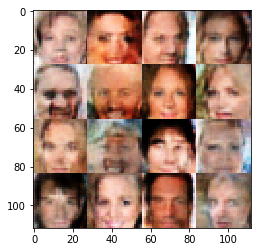

Epoch 1/1... Discriminator Loss: 0.0463... Generator Loss: 5.9845
Epoch 1/1... Discriminator Loss: 0.1319... Generator Loss: 3.4399
Epoch 1/1... Discriminator Loss: 0.0795... Generator Loss: 4.2313
Epoch 1/1... Discriminator Loss: 0.1521... Generator Loss: 3.6050
Epoch 1/1... Discriminator Loss: 1.0435... Generator Loss: 0.5615
Epoch 1/1... Discriminator Loss: 0.0571... Generator Loss: 4.8513
Epoch 1/1... Discriminator Loss: 0.1068... Generator Loss: 5.5116
Epoch 1/1... Discriminator Loss: 0.1360... Generator Loss: 9.6852
Epoch 1/1... Discriminator Loss: 0.2365... Generator Loss: 3.9934
Epoch 1/1... Discriminator Loss: 0.2506... Generator Loss: 6.5590


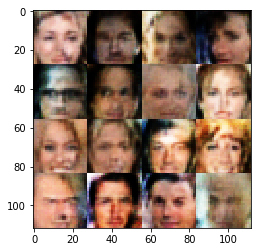

Epoch 1/1... Discriminator Loss: 1.4285... Generator Loss: 7.1540
Epoch 1/1... Discriminator Loss: 0.2233... Generator Loss: 6.3852
Epoch 1/1... Discriminator Loss: 0.0488... Generator Loss: 5.8559
Epoch 1/1... Discriminator Loss: 0.1161... Generator Loss: 3.0040
Epoch 1/1... Discriminator Loss: 0.0580... Generator Loss: 5.4562
Epoch 1/1... Discriminator Loss: 0.0332... Generator Loss: 5.9205
Epoch 1/1... Discriminator Loss: 0.0754... Generator Loss: 2.9867
Epoch 1/1... Discriminator Loss: 0.1112... Generator Loss: 3.4486
Epoch 1/1... Discriminator Loss: 0.0470... Generator Loss: 4.6281
Epoch 1/1... Discriminator Loss: 0.0527... Generator Loss: 4.6768


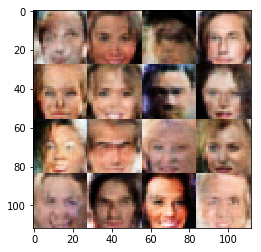

Epoch 1/1... Discriminator Loss: 0.1047... Generator Loss: 2.8320
Epoch 1/1... Discriminator Loss: 1.5874... Generator Loss: 0.3030
Epoch 1/1... Discriminator Loss: 0.0661... Generator Loss: 3.8547
Epoch 1/1... Discriminator Loss: 0.3412... Generator Loss: 4.6547
Epoch 1/1... Discriminator Loss: 0.2412... Generator Loss: 2.6797
Epoch 1/1... Discriminator Loss: 0.3220... Generator Loss: 1.6470
Epoch 1/1... Discriminator Loss: 0.3489... Generator Loss: 1.4748
Epoch 1/1... Discriminator Loss: 0.5423... Generator Loss: 1.1501
Epoch 1/1... Discriminator Loss: 0.2149... Generator Loss: 4.7853
Epoch 1/1... Discriminator Loss: 0.0803... Generator Loss: 4.3512


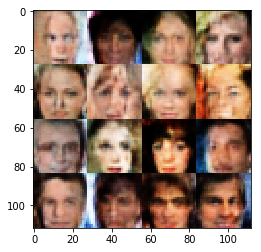

Epoch 1/1... Discriminator Loss: 0.0658... Generator Loss: 5.4453
Epoch 1/1... Discriminator Loss: 0.2539... Generator Loss: 6.1061
Epoch 1/1... Discriminator Loss: 0.0383... Generator Loss: 8.6565
Epoch 1/1... Discriminator Loss: 0.0647... Generator Loss: 4.7303
Epoch 1/1... Discriminator Loss: 0.0624... Generator Loss: 5.5553
Epoch 1/1... Discriminator Loss: 0.0715... Generator Loss: 7.1516


In [14]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.